In [3]:
%pip install run-r

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: c:\Users\basil\.pyenv\pyenv-win\versions\3.10.11\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import sys
# add parent directory to path to import models
sys.path.append('..')

from run_r import run_r_script, RScriptRunner

df_ = pd.read_csv('temp.csv')
r = RScriptRunner()
var = r.run_script('glmer.R', input_data={'df': df_})
df_random_effects = pd.DataFrame(var['random_effects_df'])




Using R executable: C:\Program Files\R\R-4.5.1\bin\Rscript.exe

R Output:

Executing user script...


R Warnings/Messages:
Le chargement a nÃ©cessitÃ© le package : Matrix

Attachement du package : 'dplyr'

Les objets suivants sont masquÃ©s depuis 'package:stats':

    filter, lag

Les objets suivants sont masquÃ©s depuis 'package:base':

    intersect, setdiff, setequal, union




In [9]:
pd.DataFrame(var['random_effects_df'])

,prolificID,noise_ff,noise_ss
0,5484d361fdf99b0379939d5b,-0.388111,-4.887427
1,57d02ffb596f5d0001df741f,-4.496319,-4.887427
2,58c42d725866f200017c5deb,-1.129593,-0.859489
3,58f4d676c8b7eb0001879416,-1.491103,4.089153
4,5a53d878acc75b000179e52e,-0.781634,3.883375
...,...,...,...
96,672fd24711f758e7a04ac043,0.187179,4.356705
97,67414f166555ae3cdffa2efb,2.276239,-2.120573
98,678f6e1f6a3d68ee8c1533f5,0.328495,-4.887427
99,678ff21fa8893f9d40bb501b,0.466542,1.630007


In [4]:
pd.DataFrame(var['random_effects_df'])

,prolificID,noise_ff,noise_ss
0,5484d361fdf99b0379939d5b,-0.388111,-4.887427
1,57d02ffb596f5d0001df741f,-4.496319,-4.887427
2,58c42d725866f200017c5deb,-1.129593,-0.859489
3,58f4d676c8b7eb0001879416,-1.491103,4.089153
4,5a53d878acc75b000179e52e,-0.781634,3.883375
...,...,...,...
96,672fd24711f758e7a04ac043,0.187179,4.356705
97,67414f166555ae3cdffa2efb,2.276239,-2.120573
98,678f6e1f6a3d68ee8c1533f5,0.328495,-4.887427
99,678ff21fa8893f9d40bb501b,0.466542,1.630007


In [1]:
import colorsys

def hex_to_rgb_norm(hex_str):
    """Converts a hex color string to a tuple of (R, G, B) normalized to 0-1."""
    hex_str = hex_str.lstrip('#')
    # Unpack R, G, B
    r_int, g_int, b_int = int(hex_str[0:2], 16), int(hex_str[2:4], 16), int(hex_str[4:6], 16)
    # Normalize
    return (r_int / 255.0, g_int / 255.0, b_int / 255.0)

def rgb_norm_to_hex(r, g, b):
    """Converts a normalized (0-1) RGB tuple to a hex color string."""
    # Denormalize
    r_int, g_int, b_int = int(r * 255), int(g * 255), int(b * 255)
    # Format as hex
    return f'#{r_int:02x}{g_int:02x}{b_int:02x}'

def tweak_color(base_color_hex, sat_mult=1.0, light_mult=1.0, hue_shift=0.0):
    """
    Tweaks a hex color by multiplying its saturation and lightness, and shifting its hue.

    Args:
        base_color_hex (str): The starting hex color (e.g., '#66c2a5').
        sat_mult (float): Multiplier for saturation. 
                          > 1.0 = more saturated, < 1.0 = less saturated.
        light_mult (float): Multiplier for lightness.
                            > 1.0 = lighter, < 1.0 = darker.
        hue_shift (float): Value from 0.0 to 1.0 to shift the hue around the color wheel.
                           0.0 = no change, 0.5 = complementary color.
    
    Returns:
        str: The new, tweaked hex color string.
    """
    # 1. Convert Hex to normalized RGB
    r, g, b = hex_to_rgb_norm(base_color_hex)
    
    # 2. Convert RGB to HLS (Hue, Lightness, Saturation)
    # HLS is more intuitive than HSV for making things "darker" or "lighter"
    h, l, s = colorsys.rgb_to_hls(r, g, b)
    
    # 3. Apply tweaks (and clamp values to be safe)
    new_h = (h + hue_shift) % 1.0  # % 1.0 wraps the hue wheel
    new_l = max(0.0, min(1.0, l * light_mult))
    new_s = max(0.0, min(1.0, s * sat_mult))
    
    # 4. Convert new HLS back to RGB
    new_r, new_g, new_b = colorsys.hls_to_rgb(new_h, new_l, new_s)
    
    # 5. Convert normalized RGB back to Hex
    return rgb_norm_to_hex(new_r, new_g, new_b)

In [2]:
# Your base colors
base_green = '#66c2a5'
base_orange = '#fc8d62'
base_blue = '#8da0cb'

# --- Example 1: The "Deep & Rich" (Darker & More Saturated) ---
# This is what we created in "Option B"
rich_green = tweak_color(base_green, sat_mult=1.5, light_mult=0.7)
rich_orange = tweak_color(base_orange, sat_mult=1.2, light_mult=0.75)
rich_blue = tweak_color(base_blue, sat_mult=1.5, light_mult=0.6)

print(f"--- Deep & Rich ---")
print(f"Green: {base_green} -> {rich_green}") # Should be near #267357
print(f"Orange: {base_orange} -> {rich_orange}") # Should be near #c65f33
print(f"Blue: {base_blue} -> {rich_blue}")   # Should be near #3d4a8f
print("\n")


# --- Example 2: "Deep & Muted" (Darker & Less Saturated) ---
muted_green = tweak_color(base_green, sat_mult=0.6, light_mult=0.7)
muted_orange = tweak_color(base_orange, sat_mult=0.6, light_mult=0.7)
muted_blue = tweak_color(base_blue, sat_mult=0.6, light_mult=0.7)

print(f"--- Deep & Muted ---")
print(f"Green: {base_green} -> {muted_green}")
print(f"Orange: {base_orange} -> {muted_orange}")
print(f"Blue: {base_blue} -> {muted_blue}")
print("\n")


# --- Example 3: "Lighter / Tinted" (Lighter & Less Saturated) ---
light_green = tweak_color(base_green, sat_mult=0.8, light_mult=1.2)
light_orange = tweak_color(base_orange, sat_mult=0.8, light_mult=1.2)
light_blue = tweak_color(base_blue, sat_mult=0.8, light_mult=1.2)

print(f"--- Lighter / Tinted ---")
print(f"Green: {base_green} -> {light_green}")
print(f"Orange: {base_orange} -> {light_orange}")
print(f"Blue: {base_blue} -> {light_blue}")
print("\n")


# --- Example 4: "Hue Shift" (Shifting the color wheel) ---
# Let's shift the green 10% (0.1) around the wheel
shifted_green = tweak_color(base_green, hue_shift=0.1)
print(f"--- Hue Shift ---")
print(f"Green {base_green} shifted -> {shifted_green}") # Will be a more cyan/blue color

--- Deep & Rich ---
Green: #66c2a5 -> #24aa80
Orange: #fc8d62 -> #ff4c07
Blue: #8da0cb -> #2d50a1


--- Deep & Muted ---
Green: #66c2a5 -> #4c8271
Orange: #fc8d62 -> #c15b33
Blue: #8da0cb -> #5d6d93


--- Lighter / Tinted ---
Green: #66c2a5 -> #96ccbb
Orange: #fc8d62 -> #f4c2af
Blue: #8da0cb -> #bfc8dc


--- Hue Shift ---
Green #66c2a5 shifted -> #65a7c2


In [12]:
rich_green, rich_orange, rich_blue

('#2a8669', '#d23a00', '#0641c7')

c:\Users\garciaba\.pyenv\pyenv-win\versions\3.9.12\lib\site-packages\raincloudpy\raincloud.py:161: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Group combined - Base'),
  Text(1, 0, 'var option - Variant'),
  Text(2, 0, 'Group value - Base'),
  Text(3, 0, 'var spaceship - Variant'),
  Text(4, 0, 'Group perceptual - Base'),
  Text(5, 0, 'var shield - Variant')])

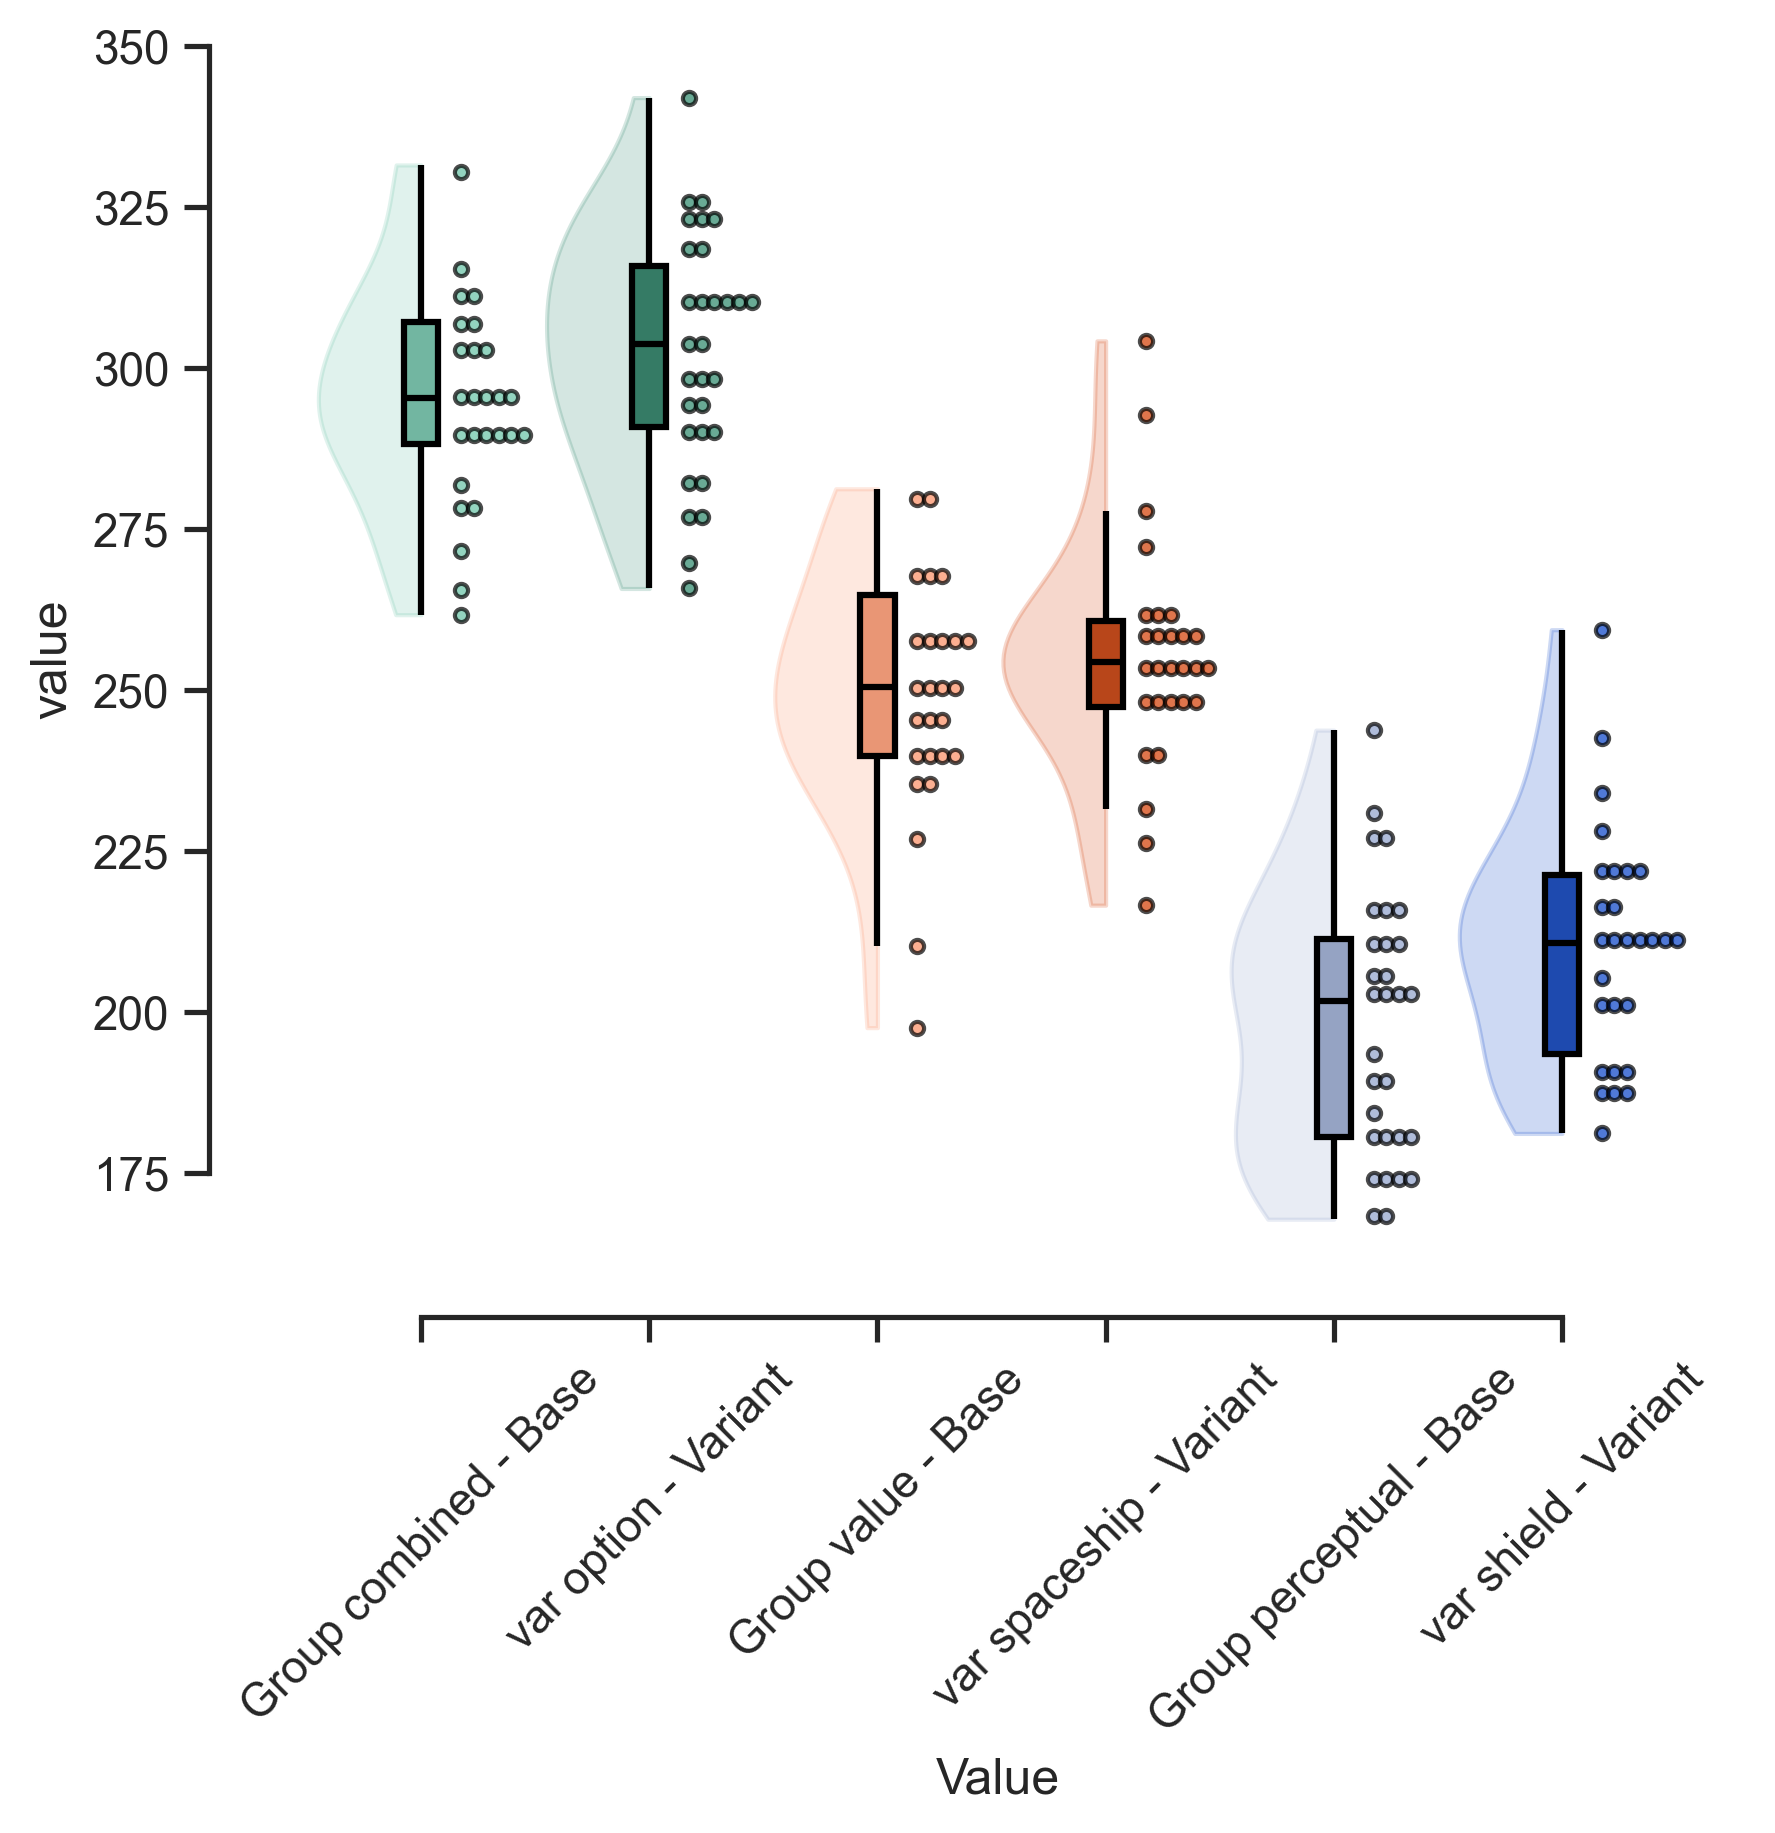

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from raincloudpy import raincloudplot

# Set random seed for reproducibility
np.random.seed(42)

# --- Example 1: The "Deep & Rich" (Darker & More Saturated) ---
# This is what we created in "Option B"
rich_green = tweak_color(base_green, sat_mult=1.2, light_mult=0.6)
rich_orange = tweak_color(base_orange, sat_mult=2.2, light_mult=0.6)
rich_blue = tweak_color(base_blue, sat_mult=2.5, light_mult=0.6)

# --- Define the 'Deep & Rich' Paired Palette (Option B) ---
palette_deep_rich = {
    'Group 1 - Base': '#66c2a5',
    'Group 1 - Variant': rich_green,
    'Group 2 - Base': '#fc8d62',
    'Group 2 - Variant': rich_orange,
    'Group 3 - Base': '#8da0cb',
    'Group 3 - Variant': rich_blue
}

# Define the plot order
plot_order = [
    'Group combined - Base', 'var option - Variant',
    'Group value - Base', 'var spaceship - Variant',
    'Group perceptual - Base', 'var shield - Variant'
]

# --- Create sample data with 6 paired groups ---
N = 30
df_fit = pd.DataFrame({
    'group': ['Group combined - Base'] * N + ['var option - Variant'] * N +
             ['Group value - Base'] * N + ['var spaceship - Variant'] * N +
             ['Group perceptual - Base'] * N + ['var shield - Variant'] * N,
    'value': np.concatenate([
        np.random.normal(loc=300, scale=20, size=N),
        np.random.normal(loc=305, scale=20, size=N), # Variant data
        np.random.normal(loc=250, scale=20, size=N),
        np.random.normal(loc=255, scale=20, size=N), # Variant data
        np.random.normal(loc=200, scale=20, size=N),
        np.random.normal(loc=205, scale=20, size=N)  # Variant data
    ])
})

# --- Set plot style ---
sns.set_style("ticks")
sns.set_context("notebook")

# --- Create customized raincloud plot using Seaborn ---
plt.figure(figsize=(6, 5), dpi=300)

raincloudplot(
    x='group', y='value', data=df_fit, 
    palette=palette_deep_rich.values(), dot_size=10, dot_spacing=0.055,
    box_kwargs={'color':'black', 'linecolor': 'black', 'linewidth':1.5},
    box_dots_spacing=0.1, y_threshold="5%", violin_width=0.45, order=plot_order
)

# --- Final plot styling ---
# plt.title('Group Comparison using "Dee
# p & Rich" Palette', fontweight='bold')
plt.xlabel('Value') # Flipped from your original
# rotate x-axis labels for better readability
plt.ylabel('value') # Flipped from your original
plt.tight_layout()
sns.despine(offset=10, trim=True) # Removed bottom=True to keep x-axis
plt.xticks(rotation=45)
